In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sy

In [2]:
def netMagnetization(config):
  """Python version of the first netMagnetization[] function Schrier writes"""
  total = 0
  for row in config:
      for element in row:
          total+= element
  return total
def netMagnetization(config):
    """Python version of the second netMagnetization[] function Schrier writes
    automatically includes summation over all levels of the array"""
    return np.sum(config)
def netMagnetizationPerSpin(config):
  """Python version of net magnetization function"""
  return netMagnetization(config)/len(config)**2
def runMC(kT, J, B, nEquil, nDataCol, sampleInterval, config, MCstepFunction, energyFunction):
    """function to run the Ising model MC simulation and collectsamples"""
    Esamples = []
    Msamples = []
    newConfig = config.copy()
    for i in range(nEquil):
        newConfig = MCstepFunction(kT, J, B, newConfig)
    for i in range(nDataCol):
        newConfig = MCstepFunction(kT, J, B, newConfig)
        if i % sampleInterval == 0:
            Esamples.append(energyFunction(newConfig,J,B))
            Msamples.append(abs(np.sum(newConfig)/len(newConfig)))
    Esamples = np.array(Esamples)
    Msamples = np.array(Msamples)
    mean_energy_spin = np.mean(Esamples)/len(config)
    hc_spin = np.var(Esamples)/(len(config)*kT**2)
    mc_spin = np.mean(Msamples)
    return [mean_energy_spin, # Mean Energy per spin
           hc_spin, # Heat Capacity per spin
           mc_spin, # Average net magnetization per spin
           newConfig] # The Final configuration

In [3]:
def arrayPlot(array,vmin=0,vmax=None):
    """A python version of the ArrayPlot[] function in Mathematica"""
    fig, ax = plt.subplots()
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.imshow(array,cmap='Greys',vmin=vmin,vmax=vmax)
    plt.show()

In [4]:
def energyIsing1D(config,J,B):
    """
    Function for calculating the energy of an Ising Model.
    Requires a config (the Ising Model in question), a value of J (interaction parameter)
    and a value for B (external field parameter)
    """
    energyB,energyJ = 0,0 # Initializes local variables
    for entry in range(len(config)): # Simultaneously loop over columns
        energyB += B*config[entry]
        if entry>0: # Left
            energyJ += J*config[entry]*config[entry]
        if entry<len(config)-1: # Right
            energyJ += J*config[entry+1]*config[entry]
    return energyB + energyJ 

def MCstep1D(kT,J,B,config):
    """functions for taking a single Monte Carlo step"""
    newConfig = config.copy() #def local variables
    entry = np.random.randint(len(config)) #pick random spin

    #calculate the energy **before the change**
    Estart = config[entry]*B
    if entry>0: # Left
        Estart += J*config[entry-1]*config[entry]
    if entry<len(config)-1: # Right
        Estart += J*config[entry+1]*config[entry]

    #a single spin flip multiplies the local energy by -1
    Eend = -Estart
    if Eend < Estart: #did energy decrease?
      newConfig[entry] *= -1 # Then flip the spin
    else:
      if np.random.random() <= np.exp(-(Eend-Estart)/kT): # If a random number is less than the probability
        newConfig[entry] *= -1 # Then flip the spin

    return newConfig

In [5]:
def runMCmovie(kT,J,B,MCstepFunction, ax):
    """a python version of the runMCmovie function"""
    nSize = 10
    checkerboardConfig = np.array([[(-1)**(row+col) for row in range(nSize)] for col in range(nSize)])
    config = checkerboardConfig.copy()
    trajectory = []
    for i in range(1500):
        config = MCstepFunction(kT,J,B,config)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        arrayplot = [ax.imshow(config,cmap='Greys',
                               vmin=-1,vmax=1, animated=True)]
        # print(arrayplot)
        trajectory.append(arrayplot)
    return trajectory #a list of arrayplot outputs

In [20]:
data_collection = 20000
sample = 1000
nSize = 36
config = [np.random.choice([-1, 1]) for _ in range(nSize)]
J = -1
B = 0
nEquil = np.linspace(10, 5160, 100, dtype=int)
kT_values = np.array([1,2,3,4,5,6,7,8,9,10])

temperature_levels = ['1', '2', '3','4','5','6','7','8','9','10']
categories = ['nm', 'hc', 'eps']

# Create empty lists using a nested loop
for category in categories:
    for temperature_level in temperature_levels:
        # Construct the variable name and create an empty list
        variable_name = f"{category}_{temperature_level}"
        globals()[variable_name] = []

for i, kT in enumerate(kT_values):
    temp_nMagnetization = []
    temp_heatCapacity = []
    temp_energy = []

    for j, nEquilibration in enumerate(nEquil):
        temp_sample = runMC(kT, B, J, nEquilibration, data_collection, sample, config, MCstep1D, energyIsing1D)
        
        if i == 0:
            nm_1.append(temp_sample[2])
            hc_1.append(temp_sample[1])
            eps_1.append(temp_sample[0])
        elif i == 1:
            nm_2.append(temp_sample[2])
            hc_2.append(temp_sample[1])
            eps_2.append(temp_sample[0])
        elif i == 2:
            nm_3.append(temp_sample[2])
            hc_3.append(temp_sample[1])
            eps_3.append(temp_sample[0])
        elif i == 3:
            nm_4.append(temp_sample[2])
            hc_4.append(temp_sample[1])
            eps_4.append(temp_sample[0])
        elif i == 4:
            nm_5.append(temp_sample[2])
            hc_5.append(temp_sample[1])
            eps_5.append(temp_sample[0])
        elif i == 5:
            nm_6.append(temp_sample[2])
            hc_6.append(temp_sample[1])
            eps_6.append(temp_sample[0])
        elif i == 6:
            nm_7.append(temp_sample[2])
            hc_7.append(temp_sample[1])
            eps_7.append(temp_sample[0])
        elif i == 7:
            nm_8.append(temp_sample[2])
            hc_8.append(temp_sample[1])
            eps_8.append(temp_sample[0])
        elif i == 8:
            nm_9.append(temp_sample[2])
            hc_9.append(temp_sample[1])
            eps_9.append(temp_sample[0])
        else:
            nm_10.append(temp_sample[2])
            hc_10.append(temp_sample[1])
            eps_10.append(temp_sample[0])


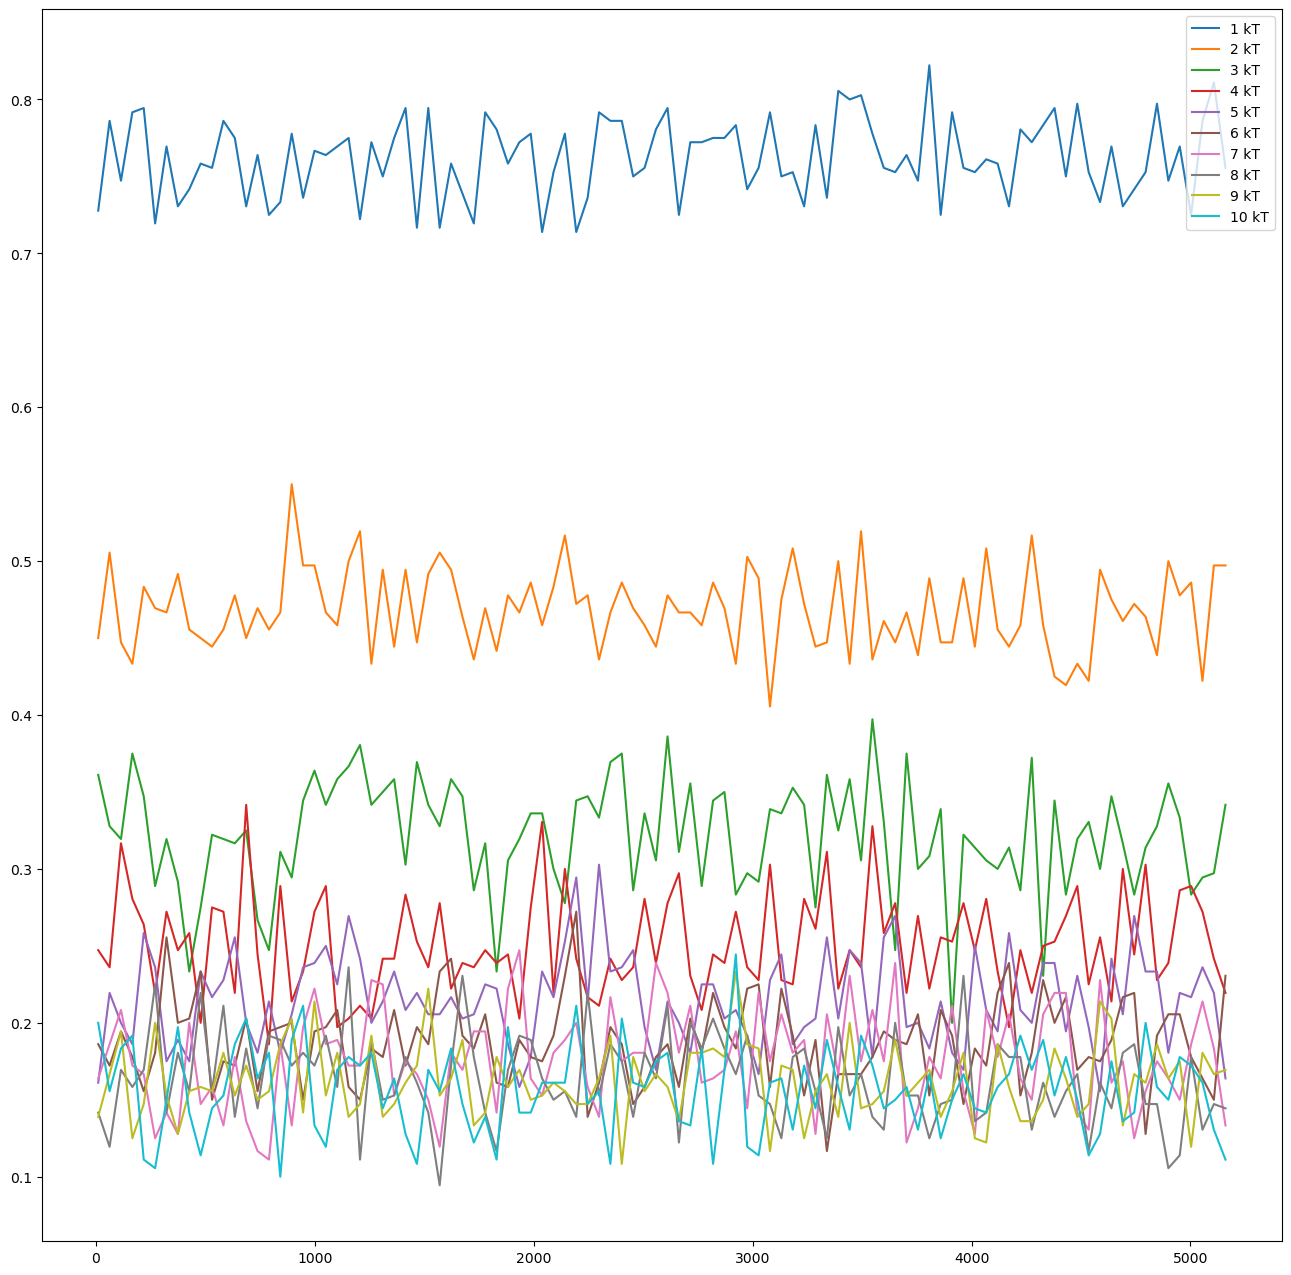

In [27]:
plt.figure(figsize=(16,16))
plt.plot(nEquil,nm_1, label="1 kT")
plt.plot(nEquil,nm_2, label="2 kT")
plt.plot(nEquil,nm_3, label="3 kT")
plt.plot(nEquil,nm_4, label="4 kT")
plt.plot(nEquil,nm_5, label="5 kT")
plt.plot(nEquil,nm_6, label="6 kT")
plt.plot(nEquil,nm_7, label="7 kT")
plt.plot(nEquil,nm_8, label="8 kT")
plt.plot(nEquil,nm_9, label="9 kT")
plt.plot(nEquil,nm_10, label="10 kT")
plt.legend()

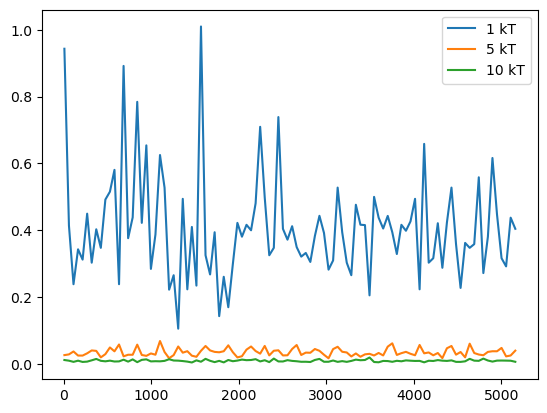

In [25]:
# plt.figure(figsize=(16,16))
plt.plot(nEquil,hc_1, label="1 kT")
# plt.plot(nEquil,hc_2, label="2 kT")
# plt.plot(nEquil,hc_3, label="3 kT")
# plt.plot(nEquil,hc_4, label="4 kT")
plt.plot(nEquil,hc_5, label="5 kT")
# plt.plot(nEquil,hc_6, label="6 kT")
# plt.plot(nEquil,hc_7, label="7 kT")
# plt.plot(nEquil,hc_8, label="8 kT")
# plt.plot(nEquil,hc_9, label="9 kT")
plt.plot(nEquil,hc_10, label="10 kT")
plt.legend()

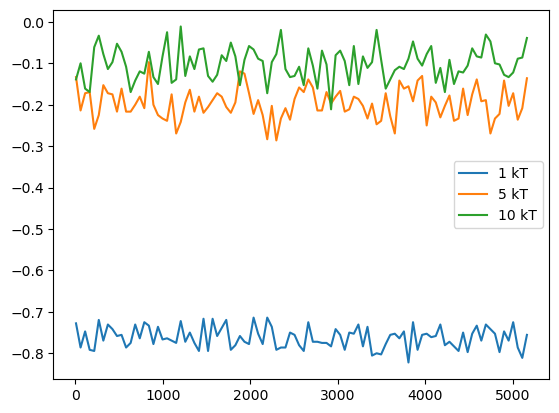

In [26]:
# plt.figure(figsize=(16,16))
plt.plot(nEquil,eps_1, label="1 kT")
# plt.plot(nEquil,eps_2, label="2 kT")
# plt.plot(nEquil,eps_3, label="3 kT")
# plt.plot(nEquil,eps_4, label="4 kT")
plt.plot(nEquil,eps_5, label="5 kT")
# plt.plot(nEquil,eps_6, label="6 kT")
# plt.plot(nEquil,eps_7, label="7 kT")
# plt.plot(nEquil,eps_8, label="8 kT")
# plt.plot(nEquil,eps_9, label="9 kT")
plt.plot(nEquil,eps_10, label="10 kT")
plt.legend()